In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

In [95]:
df = pd.read_csv("/Users/2monkey3/Desktop/song_reccomendations/spotify_songs/spotify_songs.csv")

In [96]:
# Drop NA values and remove unimportant columns and duplicate values
df.dropna(inplace=True)
df = df.drop(['track_id', 'playlist_id'], axis = 1)

In [97]:
print(df.columns)
tracks = df.sort_values(by="track_popularity", ascending=False)
tracks.drop_duplicates(subset="track_name", inplace=True)
print(df.shape)
tracks.head(10)

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_id',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')
(32828, 21)


,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,latin,latin hip hop,0.824,...,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
23104,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,r&b,hip pop,0.621,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
23109,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,r&b,hip pop,0.695,...,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280
21384,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,New Hip Hop‏‏​​ ‍,r&b,urban contemporary,0.896,...,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653
23107,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,r&b,hip pop,0.764,...,11,-7.209,1,0.0546,0.83700,0.000000,0.0822,0.575,91.019,189486
21571,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Most Popular 2020 TOP 50,r&b,urban contemporary,0.513,...,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573
20252,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Urbano: Latino Vibes,latin,latin hip hop,0.803,...,2,-3.280,1,0.2980,0.29500,0.000134,0.0574,0.574,101.085,200960
9141,Falling,Trevor Daniel,97,1Czfd5tEby3DbdYNdqzrCa,Falling,2018-10-05,Gangsta Rap 💎 Rap Party,rap,gangster rap,0.784,...,10,-8.756,0,0.0364,0.12300,0.000000,0.0887,0.236,127.087,159382
689,everything i wanted,Billie Eilish,97,4i3rAwPw7Ln2YrKDusaWyT,everything i wanted,2019-11-13,Todo Éxitos,pop,dance pop,0.704,...,6,-14.454,0,0.0994,0.90200,0.657000,0.1060,0.243,120.006,245426
18311,Don't Start Now,Dua Lipa,97,0ix3XtPV1LwmZADsprKxcp,Don't Start Now,2019-10-31,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,latin pop,0.794,...,11,-4.521,0,0.0842,0.01250,0.000000,0.0952,0.677,123.941,183290


['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
9


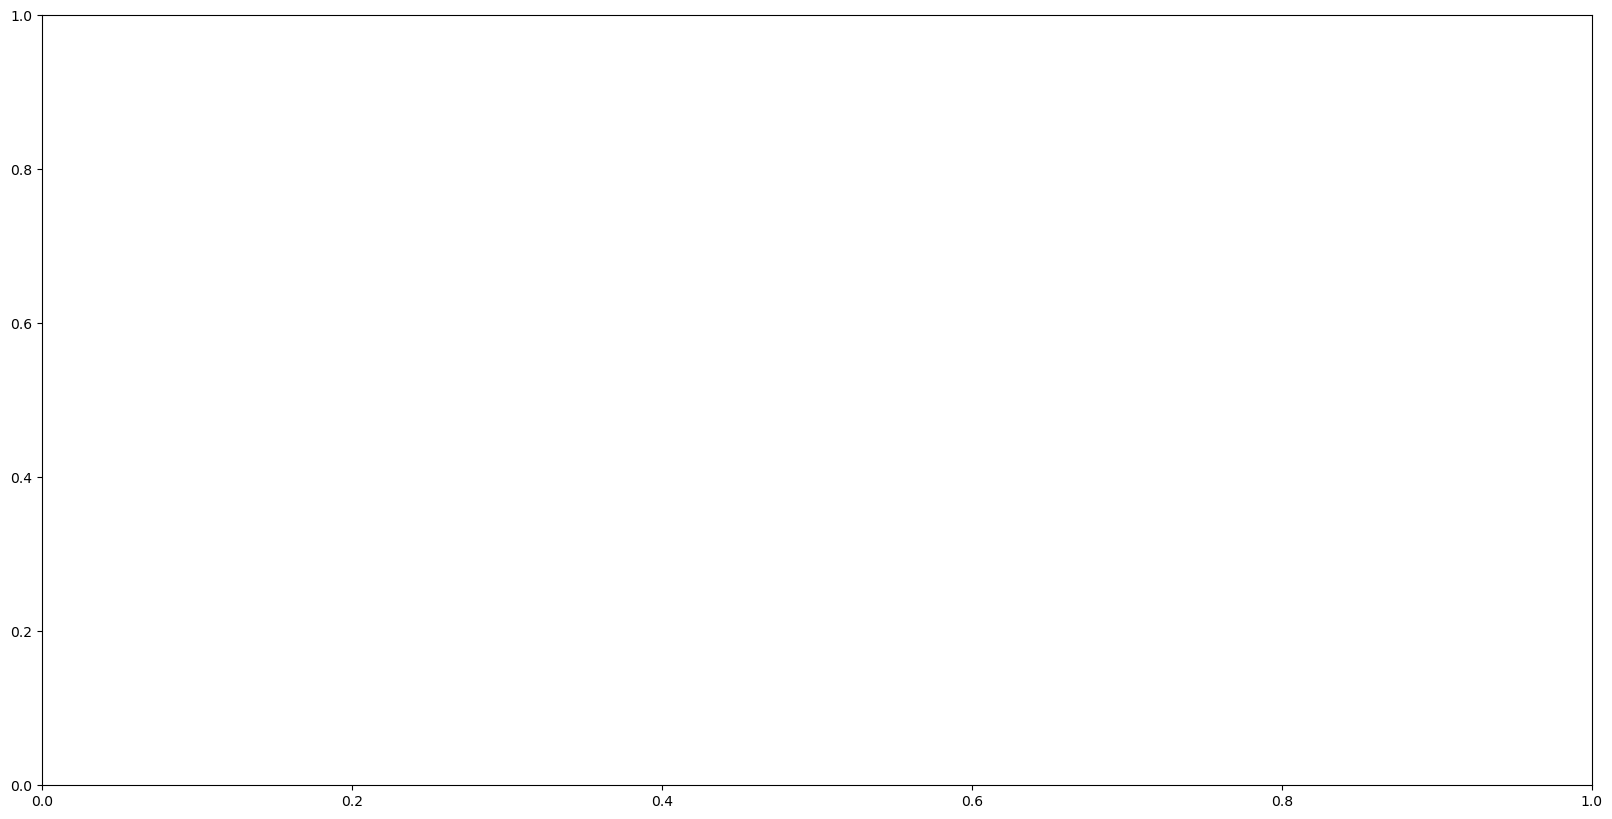

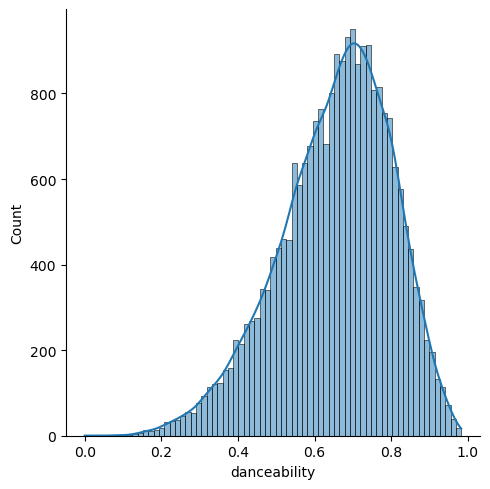

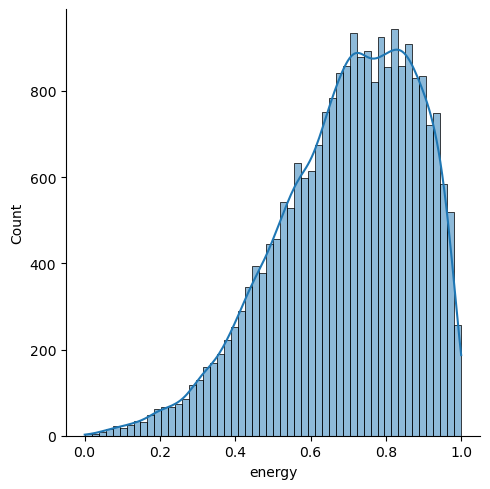

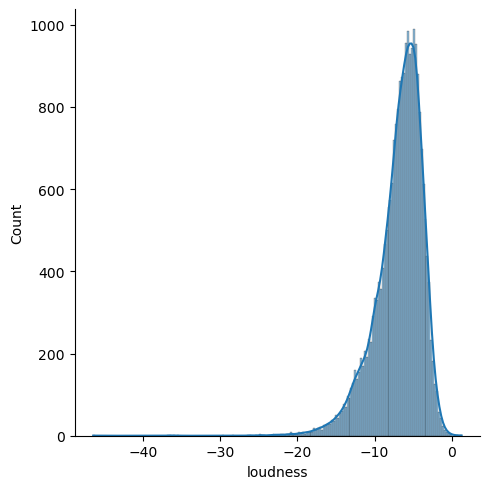

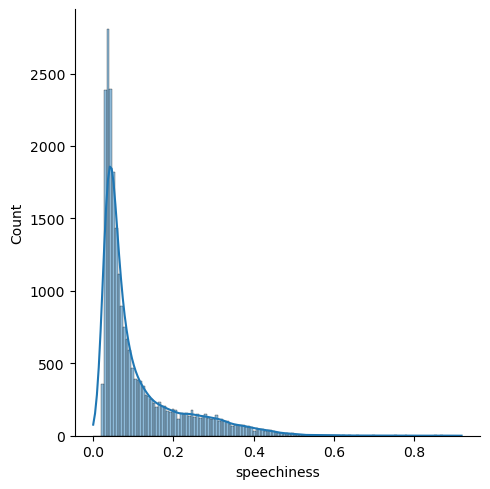

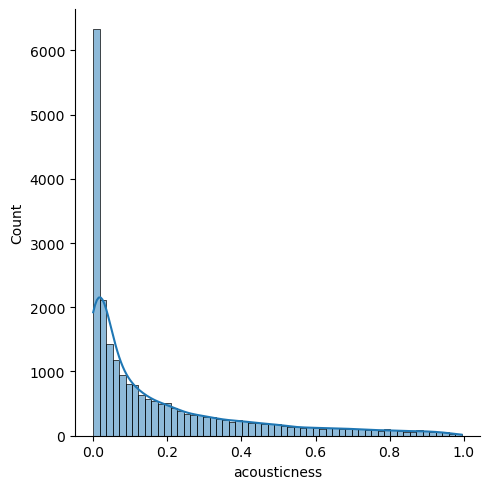

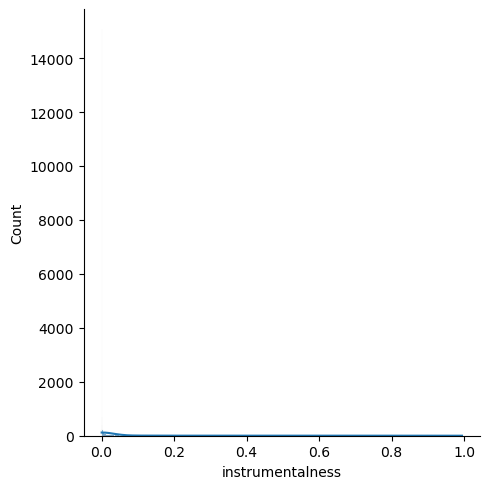

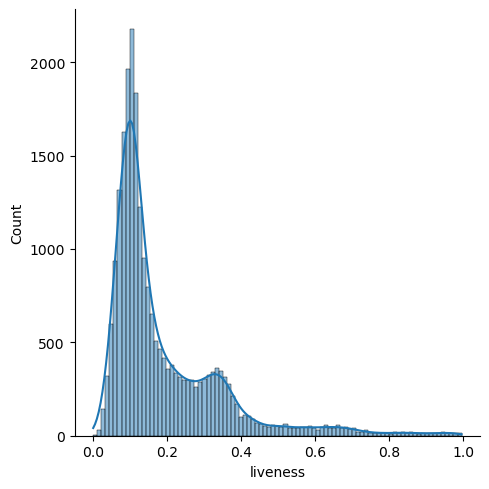

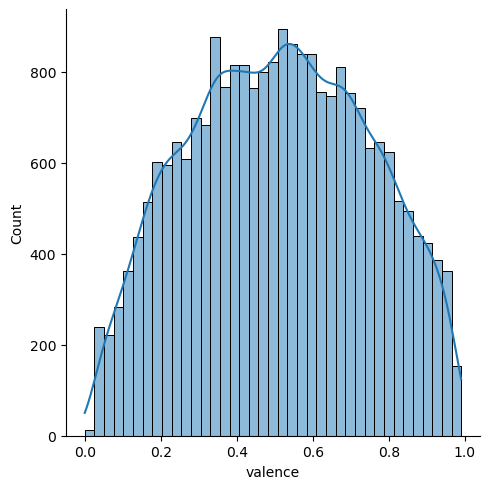

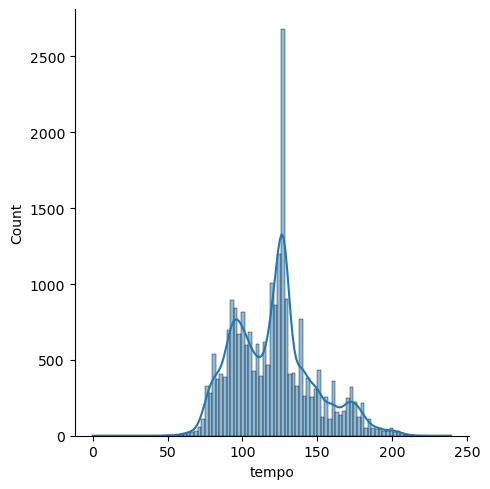

In [98]:
data = []
for col in tracks.columns:
    if tracks[col].dtype == "float":
        data.append(col)
print(data)
print(len(data))

plt.figure(figsize=(20,10))
for i, col in enumerate(data):
    plt.subplot()
    sns.displot(data=tracks[col], kde=True)
plt.show()

In [101]:
# 
tracks = tracks.head(10000)
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks["playlist_genre"])
print(tracks["track_name"].head(15))

20091                 Dance Monkey
23104                      ROXANNE
23109                      Circles
21384                      The Box
23107                     Memories
21571              Blinding Lights
20252                         Tusa
9141                       Falling
689            everything i wanted
18311              Don't Start Now
19726    RITMO (Bad Boys For Life)
30223                      bad guy
694                          Yummy
30244          HIGHEST IN THE ROOM
19748              hot girl bummer
Name: track_name, dtype: object


In [100]:
def get_similarities(song_name, data):
    text1 = song_vector.transform(data[data["track_name"]==song_name]["playlist_genres"]).toarray()
    print(text1)